In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chardet
from warnings import filterwarnings
import statistics
filterwarnings('ignore')

In [531]:
with open('globalterrorismdb_0718dist.csv','rb') as rawdata:
    result= chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [532]:
TRR=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)

In [533]:
TRR.shape

(181691, 135)

In [534]:
TRR.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [535]:
TRR=TRR[['iyear','imonth','iday','country_txt','region_txt','provstate','city','location','alternative_txt','success','suicide', 'attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','natlty1_txt','gname','motive','weaptype1_txt','weapsubtype1_txt','weapdetail','nkill','nwound']]

In [536]:
TRR.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,alternative_txt,success,...,targsubtype1_txt,corp1,natlty1_txt,gname,motive,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,1,...,Named Civilian,NaN,Dominican Republic,MANO-D,NaN,Unknown,NaN,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,1,...,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,Belgium,23rd of September Communist League,NaN,Unknown,NaN,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,1,...,Radio Journalist/Staff/Facility,Voice of America,United States,Unknown,NaN,Unknown,NaN,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,1,...,Embassy/Consulate,NaN,United States,Unknown,NaN,Explosives,Unknown Explosive Type,Explosive,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,1,...,Embassy/Consulate,NaN,United States,Unknown,NaN,Incendiary,NaN,Incendiary,NaN,NaN


# Filling the null values 

In [537]:
TRR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   provstate         181270 non-null  object 
 6   city              181257 non-null  object 
 7   location          55495 non-null   object 
 8   alternative_txt   29011 non-null   object 
 9   success           181691 non-null  int64  
 10  suicide           181691 non-null  int64  
 11  attacktype1_txt   181691 non-null  object 
 12  targtype1_txt     181691 non-null  object 
 13  targsubtype1_txt  171318 non-null  object 
 14  corp1             139141 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  gname             18

In [538]:
TRR.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
provstate              421
city                   434
location            126196
alternative_txt     152680
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
corp1                42550
natlty1_txt           1559
gname                    0
motive              131130
weaptype1_txt            0
weapsubtype1_txt     20768
weapdetail           67670
nkill                10313
nwound               16311
dtype: int64

In [547]:
TRR['provstate']=TRR['provstate'].fillna('Other')
TRR['city']=TRR['city'].fillna('Other')
TRR['nkill']=TRR['nkill'].fillna(0)
TRR['nwound']=TRR['nwound'].fillna(0)



# Terrorism over the years

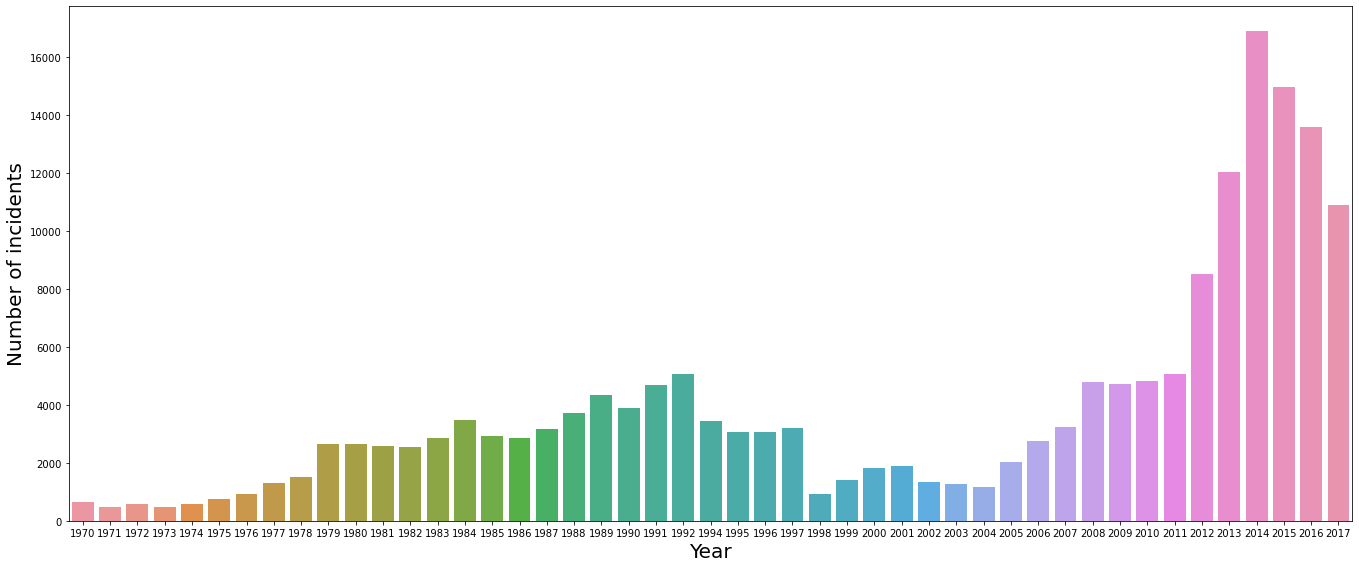

In [500]:
fig,axes=plt.subplots(figsize=(19,8))
sns.countplot(x='iyear',data=TRR)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of incidents',fontsize=20)
plt.tight_layout()

Here, one can see that acts of terrorism have significantly increased over the years, especially after the year 2007. However, the time period 1998-2006 saw a dip in the number of incidents. 

# Terrorism across regions

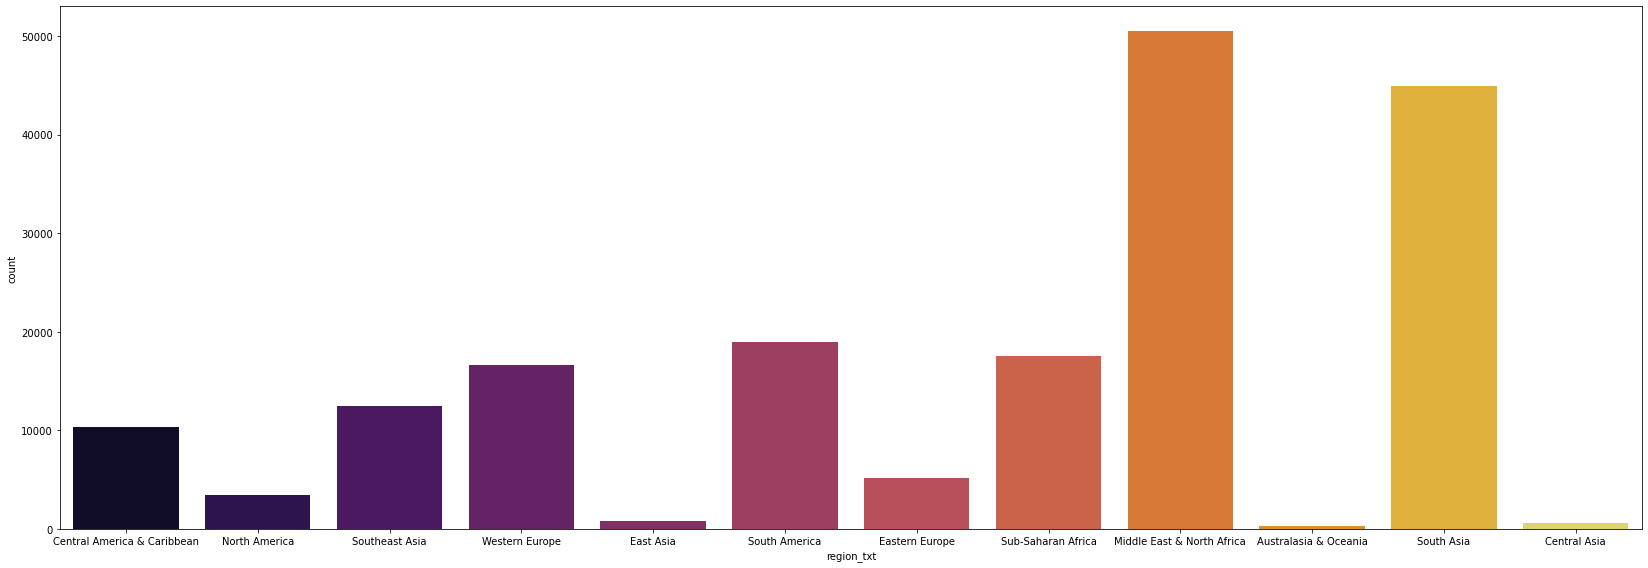

In [501]:
fig,axes=plt.subplots(figsize=(23,8))
sns.countplot(x='region_txt',data=TRR,palette='inferno')
plt.tight_layout()

In [502]:
TRR[TRR['region_txt']=='Middle East & North Africa']['iyear'].count()

50474

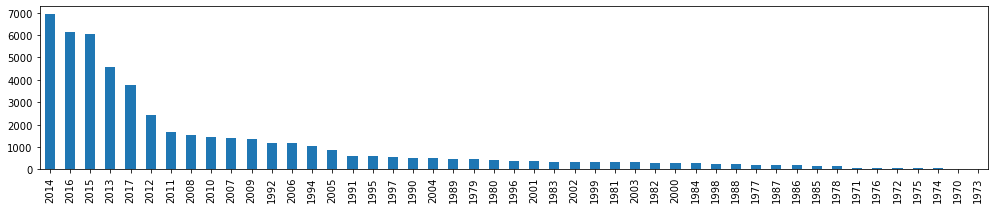

In [503]:
fig,axes=plt.subplots(figsize=(17,3))
TRR[TRR['region_txt']=='Middle East & North Africa']['iyear'].value_counts().plot.bar()
plt.show()

In [504]:
TRR[TRR['region_txt']=='South Asia']['iyear'].count()

44974

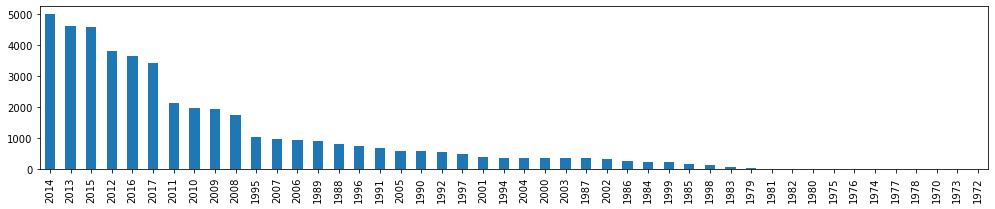

In [505]:
fig,axes=plt.subplots(figsize=(17,3))
TRR[TRR['region_txt']=='South Asia']['iyear'].value_counts().plot.bar()
plt.show()

1. Here, one can note that Middle East & North Africa and South Asia are terrorism hotspots with 50474 & 44974 incidents.
2. Further, the most damaging year for both these areas was 2014.

# Top ten terrorism infected nations

In [506]:
TRR1=TRR['country_txt'].value_counts().head(10).to_frame()
TRR2= TRR1.reset_index()
TRR2

,index,country_txt
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


# Analysing terrorism in the most affected nations

In [507]:
TRN=TRR[(TRR['country_txt']=='Iraq') | (TRR['country_txt']=='Pakistan') | (TRR['country_txt']=='Afghanistan') | 
        (TRR['country_txt']=='India') | (TRR['country_txt']=='Colombia') | (TRR['country_txt']=='Turkey') | 
        (TRR['country_txt']=='United Kingdom') | (TRR['country_txt']=='El Salvador') | (TRR['country_txt']=='Peru') |
        (TRR['country_txt']=='Philippines')]

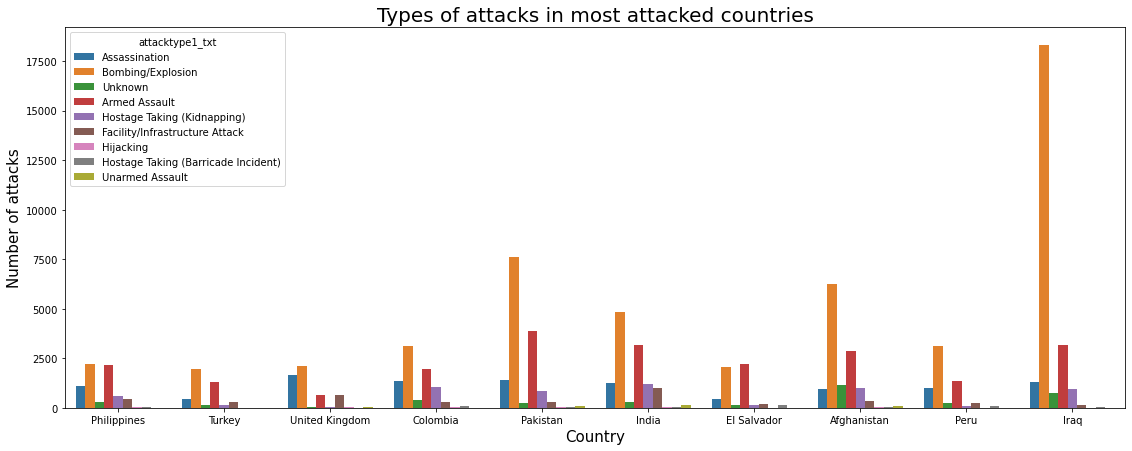

In [508]:
fig,axes=plt.subplots(figsize=(19,7))
sns.countplot(x='country_txt',data=TRN, hue='attacktype1_txt')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title('Types of attacks in most attacked countries',fontsize=20)
plt.show()

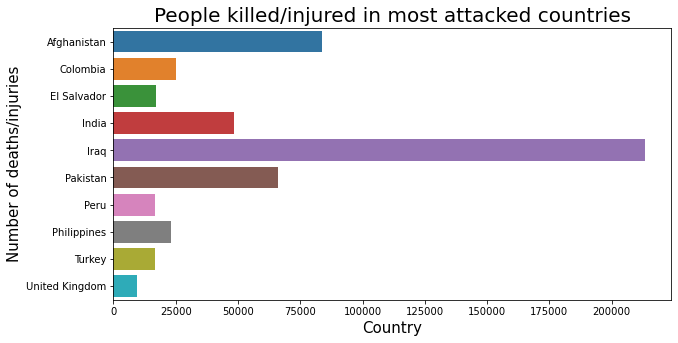

In [521]:
TRN['Human Damage']=TRN['nkill']+ TRN['nwound']
TRNN=TRN.groupby('country_txt')['Human Damage'].sum().reset_index()
fig,axes=plt.subplots(figsize=(10,5))
sns.barplot(y='country_txt',x='Human Damage',data=TRNN)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of deaths/injuries',fontsize=15)
plt.title('People killed/injured in most attacked countries',fontsize=20)
plt.show()

# Analysing terrorism by attack type

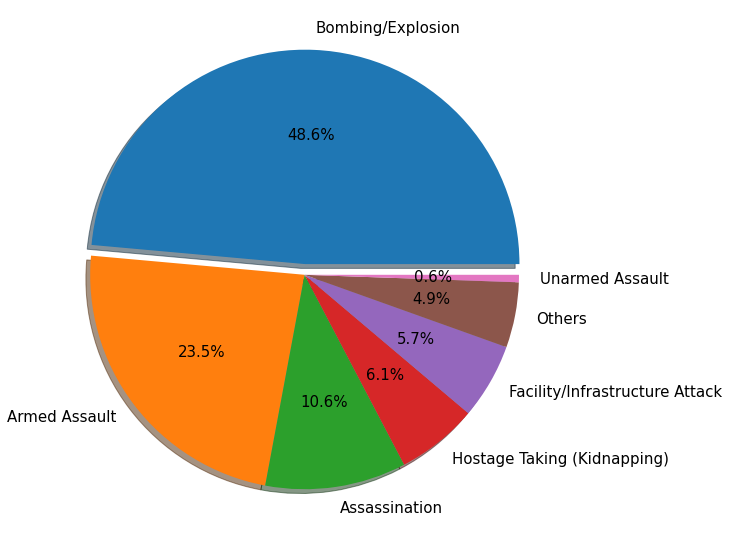

In [510]:
TRR['Attack type']=TRR['attacktype1_txt'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault',
                                                                     'Assassination'
                                                  ,'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack'
                                                  ,'Unarmed Assault']
                                                  else 'Others')

fig,axes=plt.subplots(figsize=(10,10))

labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking (Kidnapping)'
        ,'Facility/Infrastructure Attack','Others','Unarmed Assault']

sizes=[]

list1=list(TRR['Attack type'].value_counts())

for i in list1:
    per_age=(i/sum(list1))*100
    sizes.append(per_age)

axes.pie(sizes,labels=labels,autopct='%0.1f%%', shadow=True, explode=[0.05,0,0,0,0,0,0],textprops={'fontsize':15})
plt.tight_layout()
plt.show()

In [586]:
TRE=TRR[['attacktype1_txt','Human Damage']].groupby('attacktype1_txt').sum().reset_index()
TRE['Mean Damage']=list(TRR.groupby('attacktype1_txt')['Human Damage'].mean())
TRE

,attacktype1_txt,Human Damage,Mean Damage
0,Armed Assault,237663.0,5.569922
1,Assassination,38807.0,2.009476
2,Bombing/Explosion,530007.0,6.005405
3,Facility/Infrastructure Attack,7407.0,0.715238
4,Hijacking,20719.0,31.440061
5,Hostage Taking (Barricade Incident),8444.0,8.520686
6,Hostage Taking (Kidnapping),30677.0,2.749328
7,Unarmed Assault,14907.0,14.686700
8,Unknown,47106.0,6.474162


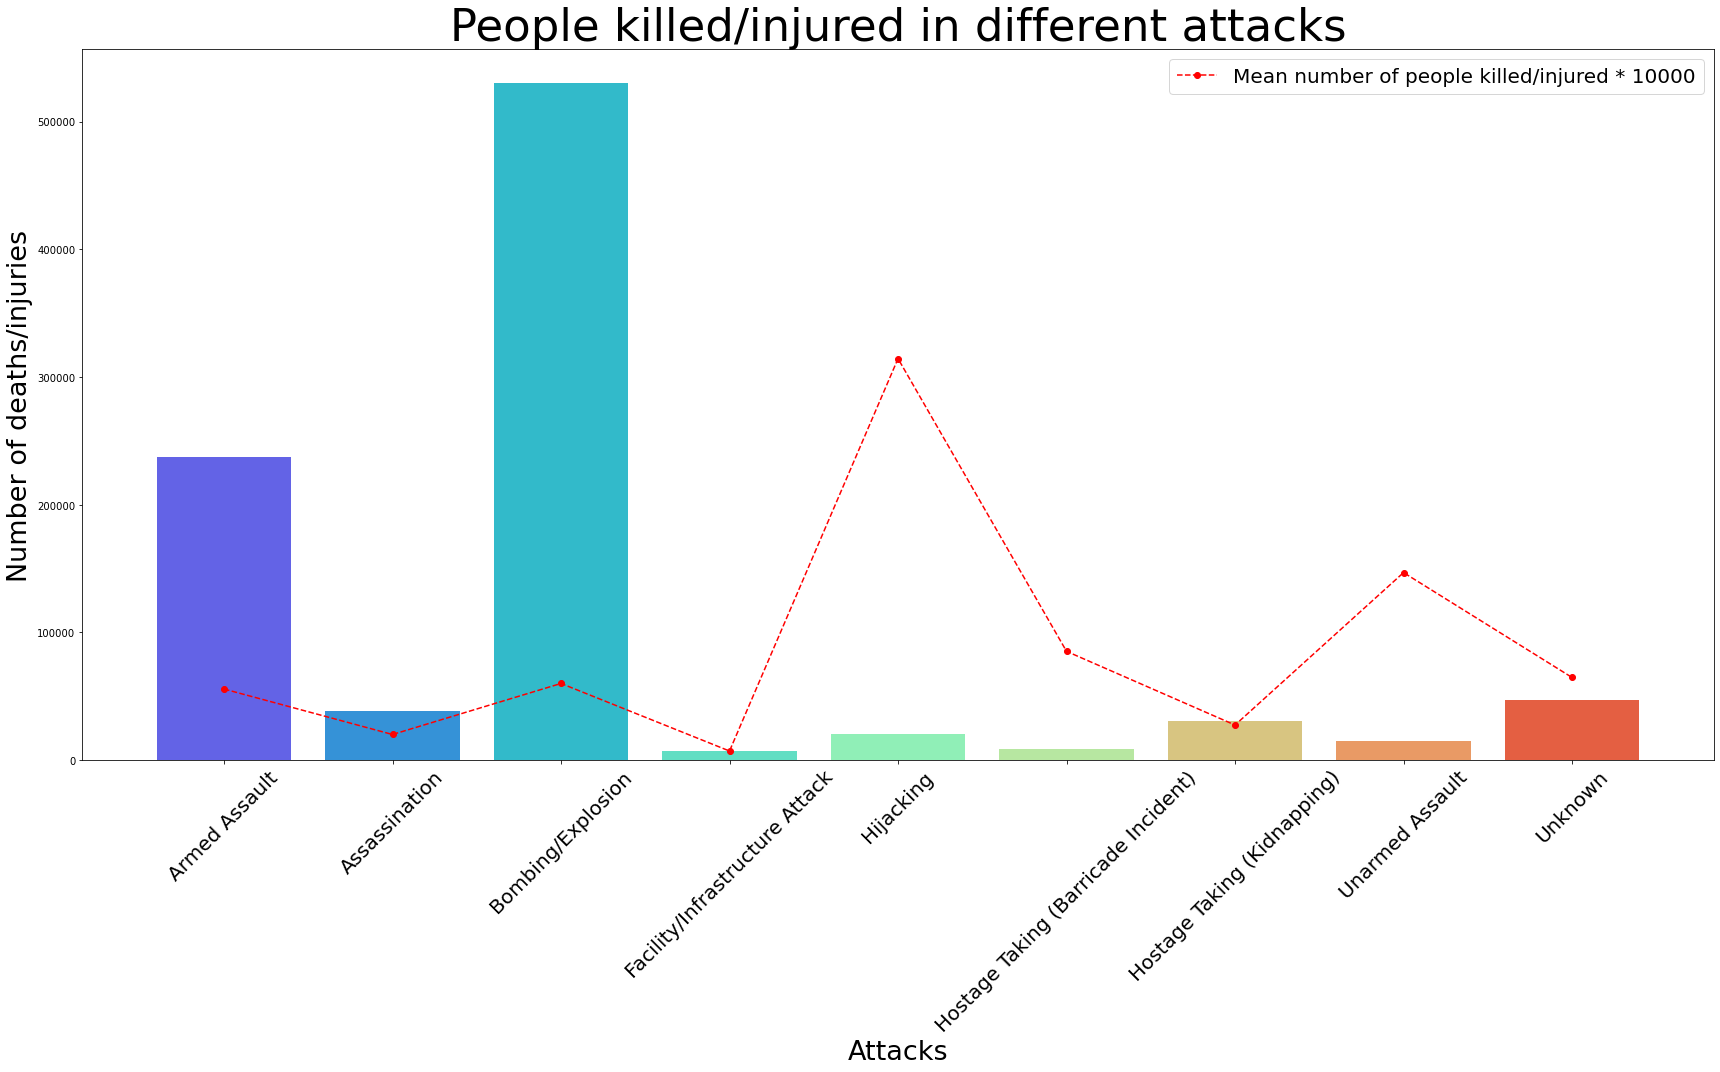

In [587]:
TRR['Human Damage']=TRR['nkill']+TRR['nwound']

TRRR=TRR.groupby('attacktype1_txt')['Human Damage'].sum().reset_index()

TRRZ=TRR.groupby('attacktype1_txt')['Human Damage'].mean().reset_index()
TRRZ['Human Damage']=TRRZ['Human Damage'].apply(lambda x : x*10000)

fig,axes=plt.subplots(figsize=(24,15))
sns.barplot(x='attacktype1_txt',y='Human Damage',data=TRRR, palette='rainbow')
axes.plot(TRRZ['attacktype1_txt'],TRRZ['Human Damage'],color='red',marker='o',linestyle='--',
          label='Mean number of people killed/injured * 10000')

axes.set_xticklabels(list(TRRR['attacktype1_txt']), rotation=45,fontsize=20)
plt.yticks(fontsize=10)

plt.xlabel('Attacks',fontsize=27)
plt.ylabel('Number of deaths/injuries',fontsize=27)
plt.title('People killed/injured in different attacks',fontsize=45)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

# Analysing impact of different weapon types

In [598]:
TRR['weaptype1_txt'].value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: weaptype1_txt, dtype: int64

In [593]:
TRR['weaptype1_txt']= TRR['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle')

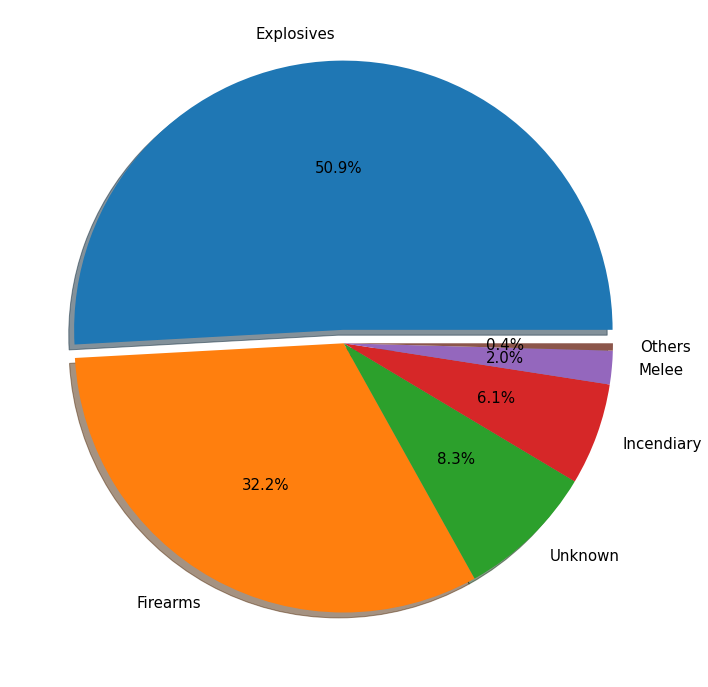

In [602]:
TRR['Weapon type']=TRR['weaptype1_txt'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown','Incendiary',
                                                                     'Melee'] else 'Others')


fig,axes=plt.subplots(figsize=(10,10))

labels=['Explosives','Firearms','Unknown','Incendiary','Melee','Others']

sizes=[]

list1=list(TRR['Weapon type'].value_counts())

for i in list1:
    per_age=(i/sum(list1))*100
    sizes.append(per_age)

axes.pie(sizes,labels=labels,autopct='%0.1f%%',explode=[0.05,0,0,0,0,0], shadow=True,textprops={'fontsize':15})
plt.tight_layout()
plt.show()

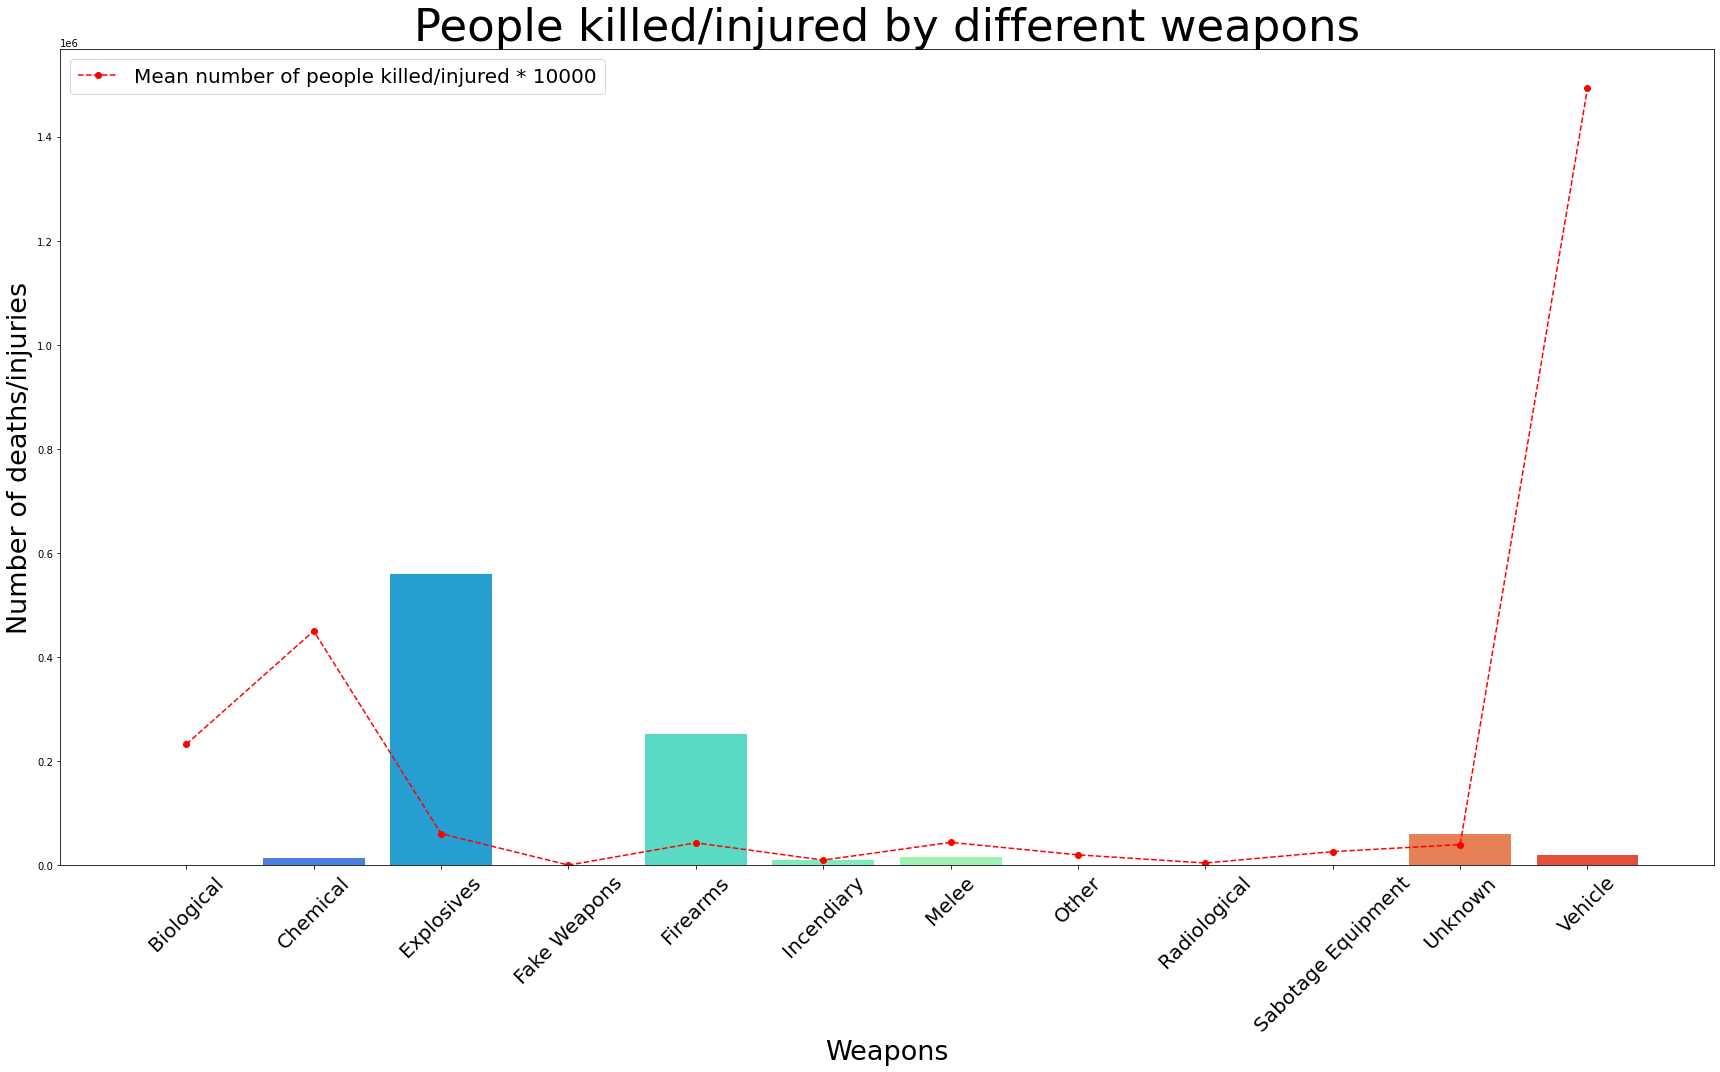

In [607]:
TRRW=TRR.groupby('weaptype1_txt')['Human Damage'].sum().reset_index()

TRRW1=TRR.groupby('weaptype1_txt')['Human Damage'].mean().reset_index()
TRRW1['Human Damage']=TRRW1['Human Damage'].apply(lambda x : x*10000)

fig,axes=plt.subplots(figsize=(24,15))
sns.barplot(x='weaptype1_txt',y='Human Damage',data=TRRW, palette='rainbow')
axes.plot(TRRW1['weaptype1_txt'],TRRW1['Human Damage'],color='red',marker='o',linestyle='--',
          label='Mean number of people killed/injured * 10000')

axes.set_xticklabels(list(TRRW['weaptype1_txt']), rotation=45,fontsize=20)
plt.yticks(fontsize=10)

plt.xlabel('Weapons',fontsize=27)
plt.ylabel('Number of deaths/injuries',fontsize=27)
plt.title('People killed/injured by different weapons',fontsize=45)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

# Analysing attack pattern of different terror groups

In [609]:
TRR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   provstate         181691 non-null  object 
 6   city              181691 non-null  object 
 7   location          55495 non-null   object 
 8   alternative_txt   29011 non-null   object 
 9   success           181691 non-null  int64  
 10  suicide           181691 non-null  int64  
 11  attacktype1_txt   181691 non-null  object 
 12  targtype1_txt     181691 non-null  object 
 13  targsubtype1_txt  171318 non-null  object 
 14  corp1             139141 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  gname             18

### Top 10 terror groups

In [690]:
TRR8=TRR[['gname','Human Damage']].value_counts().to_frame().reset_index().groupby('gname').sum().reset_index().sort_values(by='Human Damage',ascending=False).head(11).iloc[1:11]
TRR8.rename(columns={'gname':'Gang Name',0:'Number Of Attacks'},inplace=True)
TRR8

,Gang Name,Human Damage,Number Of Attacks
1535,Islamic State of Iraq and the Levant (ISIL),19496.0,5613
161,Al-Qaida,18396.0,74
1864,Liberation Tigers of Tamil Eelam (LTTE),10414.0,1606
704,Boko Haram,9391.0,2418
3138,Taliban,9155.0,7478
3165,Tehrik-i-Taliban Pakistan (TTP),8202.0,1351
165,Al-Qaida in Iraq,7472.0,638
535,Aum Shinri Kyo,6023.0,8
177,Al-Shabaab,5393.0,3288
1534,Islamic State of Iraq (ISI),5176.0,145


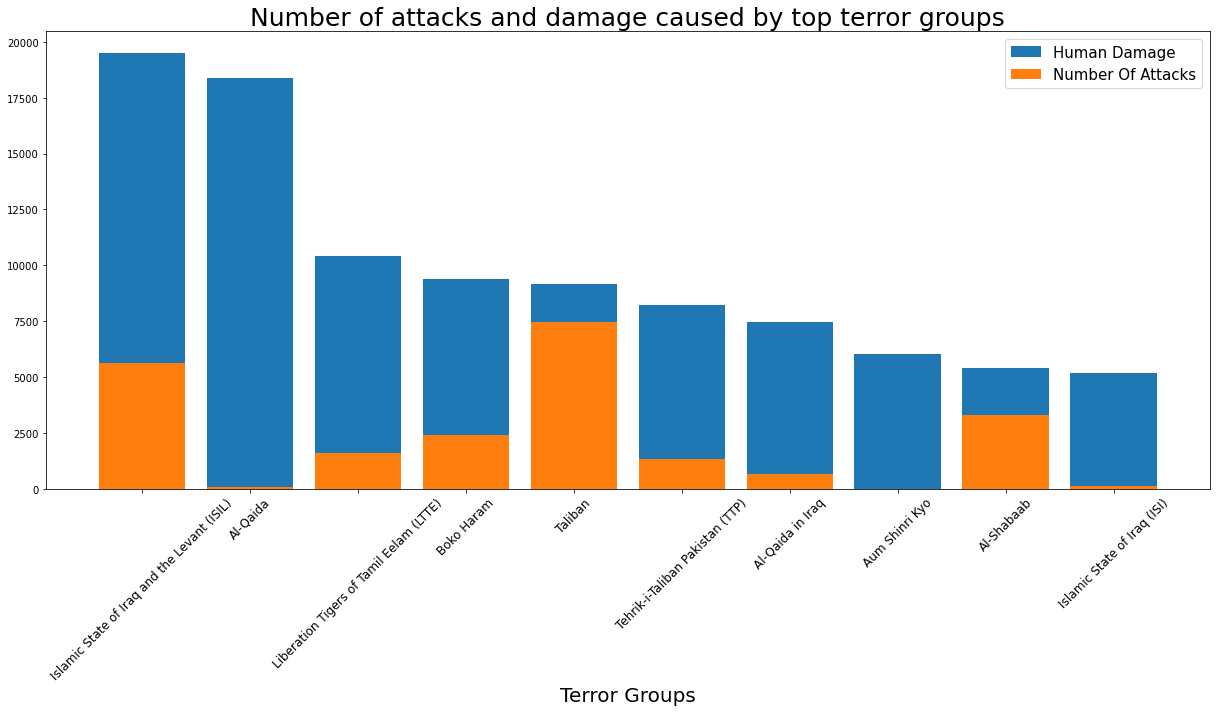

In [733]:
fig,ax= plt.subplots(figsize=(17,10))
ax.bar(TRR8['Gang Name'],TRR8['Human Damage'],label='Human Damage')
ax.bar(TRR8['Gang Name'],TRR8['Number Of Attacks'],label='Number Of Attacks')
ax.set_xticklabels(list(TRR8['Gang Name']), rotation=45, fontsize=12)
plt.xlabel('Terror Groups',fontsize=20)
plt.title('Number of attacks and damage caused by top terror groups',fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()